In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import math
import seaborn as sns
import os
# %config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

sc.settings.verbosity = 0
sc.logging.print_header()
sns.set_context("paper")

scanpy==1.10.0.dev26+gd7e1302 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


In [2]:
#pip install scanpy


In [7]:
import warnings
warnings.simplefilter( action="ignore", category=FutureWarning)

import sys
import new_misc_code as nmc 

ModuleNotFoundError: No module named 'new_misc_code'

In [3]:
# set paths to directories for data and figures
fig_path = "./NK_SCT/out_figs/"

In [10]:
#DF=pd.read_csv('./NK_SCT/IntegImmune_VarGeneData_SCT_subset_NK.txt',sep='\t',index_col=0)
#DFT=DF.T
#DFT.to_csv('./NK_SCT/IntegImmune_VarGeneData_SCT_subset_NK.T.txt',sep='\t')


# Read Data

In [2]:
# gene expression （行是细胞，列是基因）
adata = sc.read('./NK_SCT/IntegImmune_VarGeneData_SCT_subset_NK.T.txt', cache=True)

# cell type annotation
cell_types = pd.read_csv('./NK_SCT/IntegImmune_subset_NK.MetaData.txt', sep='\t',index_col=0)
group_types = pd.read_csv('./NK_SCT/IntegImmune_subset_NK.MetaData.txt', sep='\t',index_col=0)
cellgroup_types = pd.read_csv('./NK_SCT/IntegImmune_subset_NK.MetaData.txt', sep='\t',index_col=0)




In [3]:
# replace with shorter names
acronyms1 = {4: 'NK1', 12: 'NK2', 21: 'proNKT'}
acronyms2 = {'B1': 'B1','B2': 'B2','B3': 'B3','B4': 'B4','B5': 'B5','B6': 'B6','B7': 'B7','B8': 'B8'}
acronyms3 = {'B1_4': 'B1_4','B2_4': 'B2_4','B3_4': 'B3_4','B4_4': 'B4_4','B5_4': 'B5_4','B6_4': 'B6_4','B7_4': 'B7_4','B8_4': 'B8_4',
            'B1_12': 'B1_12','B2_12': 'B2_12','B3_12': 'B3_12','B4_12': 'B4_12','B5_12': 'B5_12','B6_12': 'B6_12','B7_12': 'B7_12','B8_12': 'B8_12',
            'B1_21': 'B1_21','B2_21': 'B2_21','B3_21': 'B3_21','B4_21': 'B4_21','B5_21': 'B5_21','B6_21': 'B6_21','B7_21': 'B7_21','B8_21': 'B8_21'}

# add this cell type information
cell_types = [acronyms1[cell_types.loc[cell_id, 'seurat_clusters']]
              if cell_id in cell_types.index else 'no_gate' for cell_id in adata.obs_names]
group_types = [acronyms2[group_types.loc[cell_id, 'BioGroup']]
              if cell_id in group_types.index else 'no_gate' for cell_id in adata.obs_names]
cellgroup_types = [acronyms3[cellgroup_types.loc[cell_id, 'Group']]
              if cell_id in cellgroup_types.index else 'no_gate' for cell_id in adata.obs_names]
#color_types = [acronyms3[color_types.loc[cell_id, 'color']]
              #if cell_id in color_types.index else 'no_gate' for cell_id in adata.obs_names]
adata.obs['seurat_clusters'] = cell_types
adata.obs['BioGroup'] = group_types
adata.obs['Group'] = cellgroup_types

In [4]:
adata.obs

,seurat_clusters,BioGroup,Group
AAACCCAAGACTGAGC-1_1,NK1,B1,B1_4
AAACCCAAGTATTCCG-1_1,NK1,B1,B1_4
AAACCCAAGTGATGGC-1_1,proNKT,B1,B1_21
AAACCCACAGGGAGAG-1_1,NK1,B1,B1_4
AAACGAAAGCATCTTG-1_1,NK1,B1,B1_4
...,...,...,...
TTTCCTCGTTACCTTT-1_16,NK2,B5,B5_12
TTTCGATCAACAGTGG-1_16,NK1,B5,B5_4
TTTGACTTCGTCGACG-1_16,NK2,B5,B5_12
TTTGGAGTCGAAGCAG-1_16,NK1,B5,B5_4


In [6]:
adata

AnnData object with n_obs × n_vars = 13224 × 2972
    obs: 'seurat_clusters', 'BioGroup', 'Group'

In [9]:
mat_order=['NK1', 'NK2', 'proNKT']
age_order=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8']
adata.obs["sub_clust"] = adata.obs['seurat_clusters'].astype(str)
adata.obs
#dev_trajs = [ii for ii in adata.obs_keys() if ii.split('_dev')[0] in mat_order]

,seurat_clusters,BioGroup,Group,sub_clust
AAACCCAAGACTGAGC-1_1,NK1,B1,B1_4,NK1
AAACCCAAGTATTCCG-1_1,NK1,B1,B1_4,NK1
AAACCCAAGTGATGGC-1_1,proNKT,B1,B1_21,proNKT
AAACCCACAGGGAGAG-1_1,NK1,B1,B1_4,NK1
AAACGAAAGCATCTTG-1_1,NK1,B1,B1_4,NK1
...,...,...,...,...
TTTCCTCGTTACCTTT-1_16,NK2,B5,B5_12,NK2
TTTCGATCAACAGTGG-1_16,NK1,B5,B5_4,NK1
TTTGACTTCGTCGACG-1_16,NK2,B5,B5_12,NK2
TTTGGAGTCGAAGCAG-1_16,NK1,B5,B5_4,NK1


# Nearest Neighbors

In [7]:
nn = 25
# high_adata = adata[:,adata.var.highly_variable.values]
# GABA neighbors
sc.pp.neighbors( adata, n_neighbors=nn, n_pcs=303, random_state=2)
# whole tissue neighbors
#sc.pp.neighbors( wt_adata, n_neighbors=nn, n_pcs=365, random_state=2)

# Proportion of adult neighbors at each age

In [10]:
# function to approx normalize adult nuclei for testing purposes only
def get_rand_ref_mk( ref_mk, threshold=50):
    true_cts = sum( ref_mk)
    rand_ref_mk = ref_mk.copy()
    while true_cts>threshold:
        for itr, rr in enumerate(rand_ref_mk):
            if (rr==True) and (np.random.choice( [True,False], p=[0.25,0.75])):
                rr = False
            rand_ref_mk[itr] = rr 
        true_cts = sum( rand_ref_mk)
    return( rand_ref_mk)

In [13]:
adata.obs_keys() 

['seurat_clusters', 'BioGroup', 'Group', 'sub_clust']

In [14]:
dev_trajs = ['NK1', 'NK2', 'proNKT']

In [47]:
tot_nn_df = pd.DataFrame( [], columns=age_order, dtype=int)

wt_df = adata.obs.copy()
# in_df = adata.obs.copy()
in_df = adata.obs.loc[adata.obs.index].copy()

for dev_itr in dev_trajs[:]:
    # common label for cluster
    mat_id = dev_itr.split('_dev')[0]
    # get cell type of cluster to match to correct anndata object
    cell_type = wt_df.loc[wt_df['sub_clust']==mat_id,'sub_clust'].values[0]

    dev_adata = adata[adata.obs['seurat_clusters']==dev_itr]
    
    
    dev_adj = dev_adata.obsp['distances'].copy()
    ref_mk = (dev_adata.obs['BioGroup']=='B8').values

    
    # check for small adult populations
    if sum(ref_mk)<30:
        print( mat_id, "Does NOT contain enough adult nuclei")
        continue
        
#     ################################################
#     ################################################
#     # used to control for number of adult nucs in each traj, used to look for bias in sample size
#     ref_mk = get_rand_ref_mk( ref_mk, threshold=30)
#     ################################################
#     ################################################
    
    # mask adj to only include ref columns 
    ref_adj = dev_adj[:,ref_mk].copy()
    # create bool list for ref NN hits
    ref_hit_mk = np.array( [True]*sum(ref_mk))
    # get neighbors for nucs at each age
    tot = 0
    tot_mk = np.array( [False]*sum(ref_mk))
    for a_itr in age_order:
        ### get NN of age to adult
        # row mask adj by age
        s_mk = (dev_adata.obs['BioGroup']==a_itr).values
        s_adj = ref_adj[s_mk].copy()
        ### get NN of adult to age
        age_adj = dev_adj[:,s_mk].copy()
        ar_adj = age_adj[ref_mk].copy()
        ### total hits for age, all connections
        nn_hits = (s_adj>0).sum() + (ar_adj>0).sum()
        
        if nn_hits==0:
            tot_nn_df.loc[f"{mat_id}",a_itr] = 0
        else:
            tot_nn_df.loc[f"{mat_id}",a_itr] = nn_hits / (sum(s_mk) * sum(ref_mk))
#     print( mat_id)        

In [48]:
tot_nn_df

,B1,B2,B3,B4,B5,B6,B7,B8
NK1,0.000396,0.000885,0.000509,0.001804,0.002690,0.001664,0.012514,0.027449
NK2,0.000000,0.000255,0.000375,0.002151,0.004748,0.002938,0.017280,0.069467


In [43]:
tot_nn_df

,B1,B2,B3,B4,B5,B6,B7,B8
NK1,0.000396,0.000885,0.000509,0.001804,0.002690,0.001664,0.012514,0.027449
NK2,0.000000,0.000255,0.000375,0.002151,0.004748,0.002938,0.017280,0.069467
proNKT,0.013441,0.021580,0.100262,0.088906,0.112903,0.101224,0.160050,0.178980


# Cumulative Sum of proportion of adult neighbors at each age

In [44]:
plot_mat_order = np.array( mat_order)[np.in1d( mat_order, tot_nn_df.index)]
#color_dict = adata.uns['major_clust_colors_dict']

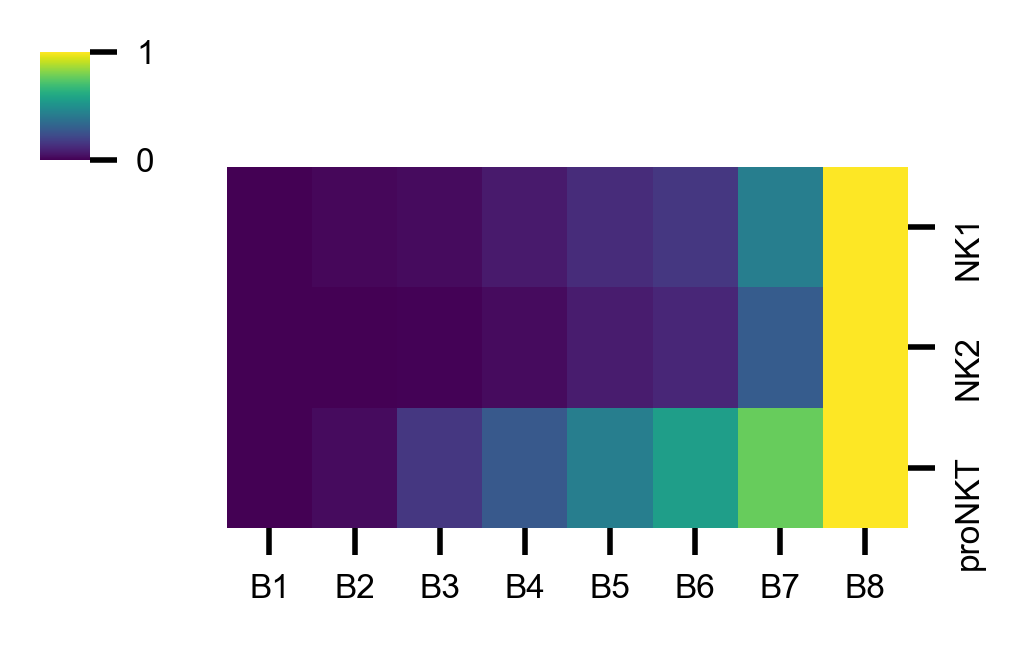

In [45]:
sc.settings.set_figure_params( dpi=200, fontsize=6)
# col_cc = [wt_adata.uns['stage_colors_dict'][ii] for ii in wt_adta.uns['stage_order']]
#row_cc = [color_dict[wt_df.loc[wt_df['sub_clust']==ii,'major_clust'].values[0]] for ii in plot_mat_order[:]]

g = sns.clustermap( np.cumsum( tot_nn_df.loc[plot_mat_order[:]], axis=1), cmap='viridis', linewidths=0.0, linecolor="grey", figsize=(2.5,1.5), 
                   row_cluster=False, col_cluster=False, standard_scale=0)#, col_colors=col_cc)
fig = g.fig
#fig.savefig( f"{fig_path}Nearest-Neighbor_Maturation.svg", format='svg', bbox_inches='tight')

In [21]:
age_order

['B1', 'B5', 'B6', 'B7', 'B8', 'B2', 'B3', 'B4']

In [18]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 25, 'method': 'umap', 'random_state': 2, 'metric': 'euclidean', 'n_pcs': 303}})])
With overloaded keys:
	['neighbors'].

In [8]:
adata.obs.head()

,seurat_clusters,BioGroup,Group
AAACCCAAGACTGAGC-1_1,NK1,B1,B1_4
AAACCCAAGTATTCCG-1_1,NK1,B1,B1_4
AAACCCAAGTGATGGC-1_1,proNKT,B1,B1_21
AAACCCACAGGGAGAG-1_1,NK1,B1,B1_4
AAACGAAAGCATCTTG-1_1,NK1,B1,B1_4


# Corr

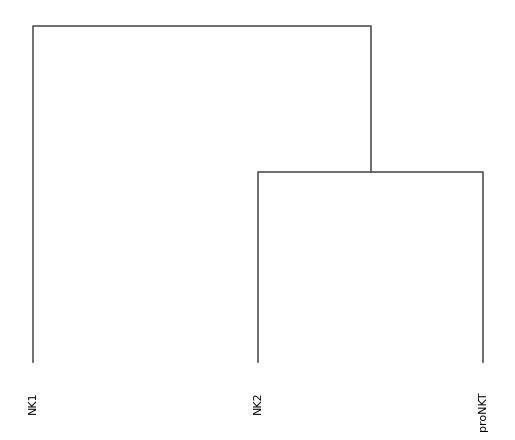

<AxesSubplot: >

In [17]:
adata.obs['seurat_clusters2'] = adata.obs['seurat_clusters'].astype('category')
sc.tl.dendrogram(adata,groupby='seurat_clusters2')
sc.pl.dendrogram(adata,groupby='seurat_clusters2')

In [6]:
adata.obs['seurat_clusters2'] = adata.obs['seurat_clusters'].astype('category')
sc.tl.dendrogram(adata, groupby='seurat_clusters2')
#sc.pl.dendrogram(adata, groupby='seurat_clusters2')
sc.pl.corrlation_matrix(adata, 'seurat_clusters2', figsize=(5,4))

AttributeError: module 'scanpy.plotting' has no attribute 'corrlation_matrix'

In [ ]:
sc.pl.correlation_matrix

In [23]:
import scanpy as sc

In [22]:
pip install git+https://github.com/theislab/scanpy.git

  Cloning https://github.com/theislab/scanpy.git to /private/var/folders/rv/vr9n55m9305f6mdwhcyckhdm0000gn/T/pip-req-build-rdnrputn
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git /private/var/folders/rv/vr9n55m9305f6mdwhcyckhdm0000gn/T/pip-req-build-rdnrputn
  fatal: unable to access 'https://github.com/theislab/scanpy.git/': LibreSSL SSL_read: error:02FFF03C:system library:func(4095):Operation timed out, errno 60
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git /private/var/folders/rv/vr9n55m9305f6mdwhcyckhdm0000gn/T/pip-req-build-rdnrputn did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git /private/var/folders/rv/vr9n55m9305f6mdwhcyckhdm0000gn/T